## Week 2: Data Analysis with pandas and CSV Files.

Goal: Learn how to load, explore, and summarize real-world datasets using pandas.


In [71]:
# Importing the pandas library.

import pandas as pd

In [72]:
df = pd.read_csv("sales_data.csv")
df

,customer,product,amount
0,Alice,Phone,300
1,Bob,Laptop,700
2,Alice,Tablet,200
3,Bob,Phone,300
4,Mary,Laptop,300


In [73]:
df.head()

,customer,product,amount
0,Alice,Phone,300
1,Bob,Laptop,700
2,Alice,Tablet,200
3,Bob,Phone,300
4,Mary,Laptop,300


In [74]:
df.describe()

,amount
count,5.000000
mean,360.000000
std,194.935887
min,200.000000
25%,300.000000
50%,300.000000
75%,300.000000
max,700.000000


### Dataset Overview (`df.info()`)

1. **Rows and Columns**  
   The dataset contains **5 rows and 3 columns**.  
   The `RangeIndex` shown by pandas represents the row index (0 to 4), which is automatically generated to label each row.

2. **Data Types**  
   The dataset contains two data types:
   - `object` → used for text data such as customer names and product names  
   - `int64` → used for numerical values such as the amount spent

3. **Why This Matters for Analysis**  
   Understanding the structure and data types of a dataset is important because it helps identify how the data can be cleaned, transformed, and analyzed.  
   For example, numerical columns can be aggregated and summarized, while object columns may need cleaning, normalization, or grouping.


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   customer  5 non-null      object
 1   product   5 non-null      object
 2   amount    5 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


### Selecting, Filtering, and Asking Questions with pandas.

In [76]:
# Selecting specific columns

df["amount"] # this selects only the "amount" column from the dataframe(a series)

df[["customer", "amount"]] # this selects multiple columns from the dataframe.

,customer,amount
0,Alice,300
1,Bob,700
2,Alice,200
3,Bob,300
4,Mary,300


**Why this matters**

You rarely analyze everything at once.

You isolate what matters for the question you’re asking.

*Business thinking:*    I only care about customer and spend right now.

In [77]:
# Filtering rows

df[df["amount"] > 300]  # this filters the dataframe to show only rows where the amount is greater than 300.

df[df["product"] == "Phone"]

,customer,product,amount
0,Alice,Phone,300
3,Bob,Phone,300


In [78]:
# Combining conditions

df[(df["product"] == "Phone") & (df["amount"] > 300)] # this filters the dataframe to show only rows where the product is phone and amount is greater than 300.

,customer,product,amount


### Mini Exercise

Answer these using code:

1. Show all purchases made by Alice

2. Show all purchases where amount ≥ 500

3. Show all Laptop purchases under 600


In [79]:
# Show all purchases made by customer "Alice"

df[df["customer"] == "Alice"][["customer", "product", "amount"]] # here we didn't use the & operator because there is only one condition

,customer,product,amount
0,Alice,Phone,300
2,Alice,Tablet,200


In [80]:
# Show all purchases where the amount is greater than or equal to 500

df[df["amount"] >= 500]

,customer,product,amount
1,Bob,Laptop,700


In [81]:
# Show laptop purchases under 600

df[(df["product"] == "Laptop") & (df["amount"] < 600)]

,customer,product,amount
4,Mary,Laptop,300


**Note**

Filter rows → then select columns.

When *Filtering* conditions should always come before columns.

### Grouping

**Total spend per customer**

This answers:

“How much money did each customer spend in total?”

***What happens step by step***

1. `groupby("customer")`
→ splits the rows by customer name


2. `["amount"]`
→ selects the column we want to calculate on


3. `.sum()`
→ adds up amounts per customer


In [82]:
df.groupby("customer")["amount"].sum()

customer
Alice     500
Bob      1000
Mary      300
Name: amount, dtype: int64

**Total spend per product**

📌 Business question:

“Which product generates the most revenue?”

In [83]:
df.groupby("product")["amount"].sum()

product
Laptop    1000
Phone      600
Tablet     200
Name: amount, dtype: int64

**Multiple metrics at once**

*What this gives you*

For **each customer**:

- sum → total spend

- mean → average purchase value

- count → number of purchases

In [84]:
df.groupby("customer")["amount"].agg(["sum", "mean", "count"])

,sum,mean,count
customer,,,
Alice,500,250.0,2
Bob,1000,500.0,2
Mary,300,300.0,1


**Reset index(very important habit)**

By default, `groupby()` makes the grouped column the index.

To turn it back into a normal column you'll use the `.reset_index` 

*📌 Why this matters:*

- Easier to merge with other tables

- Easier to export to Excel

- Easier to plot

**Group by two columns**

*📌Business question*

“How much did each customer spend on each product?”

In [85]:
df.groupby(["customer", "product",])["amount"].sum()

customer  product
Alice     Phone      300
          Tablet     200
Bob       Laptop     700
          Phone      300
Mary      Laptop     300
Name: amount, dtype: int64

### Mini Exercise

Answer these questions with code.

1️⃣ Total number of purchases per customer

2️⃣ Average spend per product

3️⃣ Customer + product total spend table

In [86]:
# Total number of purchases per customer.

df["customer"].value_counts()

customer
Alice    2
Bob      2
Mary     1
Name: count, dtype: int64

In [87]:
# Average spend per product.

df.groupby("product")["amount"].mean()

product
Laptop    500.0
Phone     300.0
Tablet    200.0
Name: amount, dtype: float64

In [88]:
# Total spend per customer-product combination.(Table format)

df.groupby(["customer", "product"])["amount"].agg(["sum"]).reset_index()

,customer,product,sum
0,Alice,Phone,300
1,Alice,Tablet,200
2,Bob,Laptop,700
3,Bob,Phone,300
4,Mary,Laptop,300


### Visualization Basics.


👉 Multiple aggregations + simple plots from groupby

In [89]:
# importing matplotlib for visualization

import matplotlib.pyplot as plt

### Total sales per product (barchart)

*NOTE*

At this point:

`product_sales` is a Series

Index → product

Values → total sales

In [90]:
# Group the data.

product_sales = df.groupby("product")["amount"].sum()

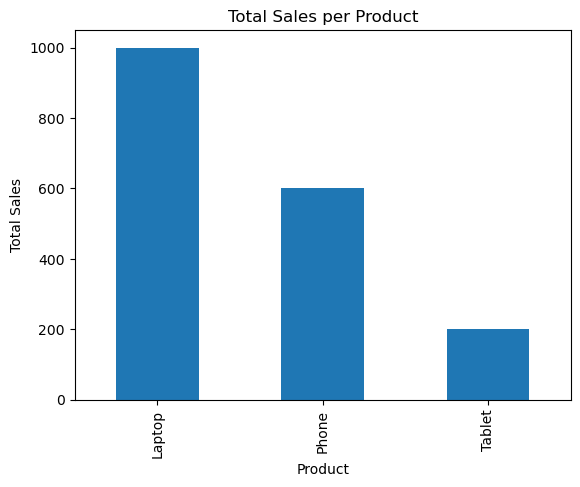

In [91]:
# Plotting the data.

product_sales.plot(kind="bar")
plt.title("Total Sales per Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()


**📌 What this answers**:

“Which products generate the most revenue?”

### Average spend per product (barchart)

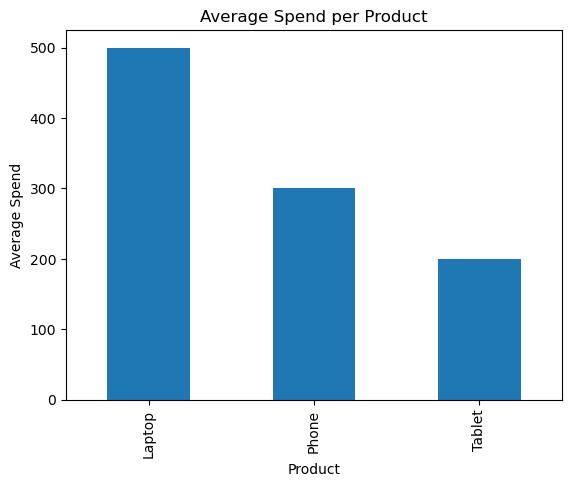

In [92]:
# first, calculate the average spend per product.

avg_product_spend = df.groupby("product")["amount"].mean()

# Now, plot the average spend per product.

avg_product_spend.plot(kind="bar",)
plt.title("Average Spend per Product")
plt.xlabel("Product")
plt.ylabel("Average Spend")
plt.show()

**📌 Business insight:**

- High total sales ≠ high average value

- This helps pricing and positioning decisions

### Customer behavior: Total spend per customer.

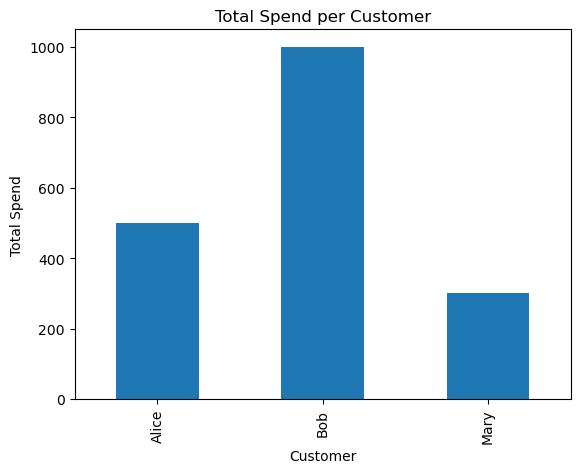

In [93]:
# Calculate total spend per customer.

customer_spend = df.groupby("customer")["amount"].sum()

# Plot total spend per customer.

customer_spend.plot(kind="bar")
plt.title("Total Spend per Customer")
plt.xlabel("Customer")
plt.ylabel("Total Spend")
plt.show()


**📌 This answers:**

“Who are our most valuable customers by revenue?”

### Frequency vs Value 

In [94]:
# Build the table showing frequency and total amount spent per customer.

customer_summary = df.groupby("customer")["amount"].agg(["count", "sum"])
customer_summary


,count,sum
customer,,
Alice,2,500
Bob,2,1000
Mary,1,300


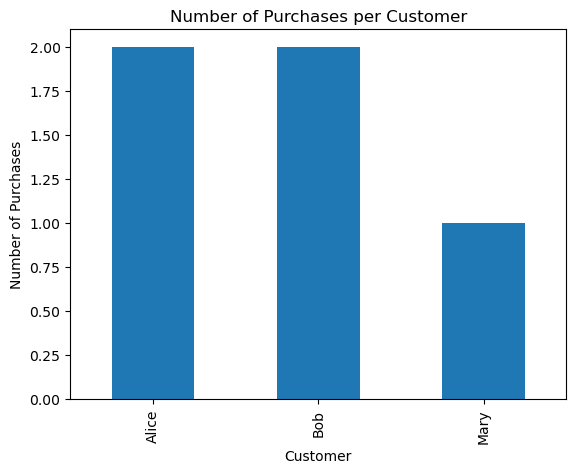

In [95]:
# Visualize customer purchase frequency.

customer_summary["count"].plot(kind="bar")
plt.title("Number of Purchases per Customer")
plt.xlabel("Customer")
plt.ylabel("Number of Purchases")
plt.show()

**📌 This answers:**

“Who buys often?”

### Think like an analyst

Answer this in **markdown:**

- Who buys often but spends less?

- Who buys rarely but spends more?

- Which metric matters more depends on business goal

**Who buys often but spends less?**

From the insights gained from the above charts, it shows that Alice purchases frequently but doesn't spend as much as other customers.

**Who buys rarely but spends more?**

Bob was shown to be a customer that spends more on fewer purchases.

**Which metric matters more depends on business goal**

***Note***

Group first. Plot second. Interpret always.

### Mini Exercise

Do one of these:

1️⃣ Plot average spend per customer

2️⃣ Plot total spend per product but sorted descending

3️⃣ Create a markdown explanation for one chart (business style)

**🧠 Business Explanation**

Chart: Average Spend per Customer

What does this show?

This chart shows how much each customer spends on average per purchase.

**Why does this matter?**

- A customer with high average spend is likely purchasing premium or high-ticket items.

- This helps identify high-value customers, even if they don’t buy frequently.

**Business decision:**

- Customers with high average spend can be targeted with premium offers or loyalty programs.

- Customers with low average spend but high frequency could be nudged toward bundles or upsells.

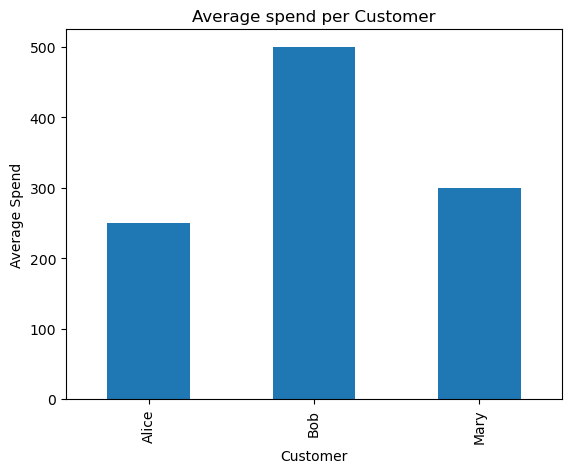

In [96]:
# calculate average purchase amount per customer.

customer_avg_spend = df.groupby("customer")["amount"].mean()
customer_avg_spend

# plot 
customer_avg_spend.plot(kind="bar")
plt.title("Average spend per Customer")
plt.xlabel("Customer")
plt.ylabel("Average Spend")
plt.show()


**Chart: Total Spend per Product (Descending)**

***What does this show?***

This chart shows which products generate the most revenue overall.

***Why descending order matters:***

- The top-performing products are immediately visible.

- This helps prioritize inventory, marketing, and pricing strategies.

***Business decision:***

- Invest more in high-revenue products.

- Re-evaluate or bundle low-performing products.

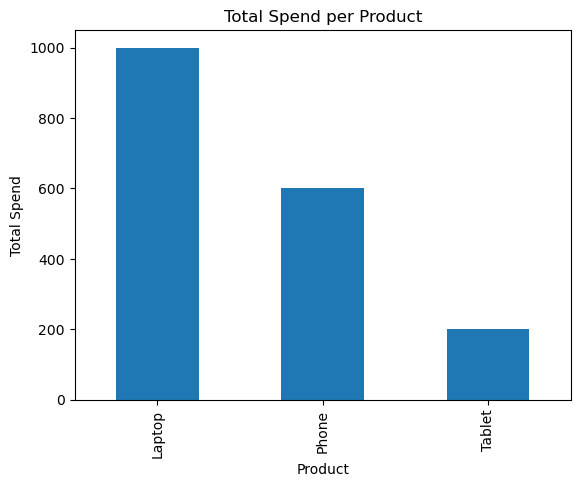

In [97]:
# total spend per product in descending order.

product_total_spend = df.groupby("product")["amount"].sum().sort_values(ascending=False)

# plot the total spend per product.

product_total_spend.plot(kind="bar")
plt.title("Total Spend per Product")
plt.xlabel("Product")
plt.ylabel("Total Spend")
plt.show()

### Frequency + Value Chart

In [98]:
# Now we combine how often + how much.

customer_summary = df.groupby("customer").agg(
    total_spend=("amount", "sum"),
    purchase_count=("amount", "count"),
    average_spend=("amount", "mean")
)
print(customer_summary)

          total_spend  purchase_count  average_spend
customer                                            
Alice             500               2          250.0
Bob              1000               2          500.0
Mary              300               1          300.0


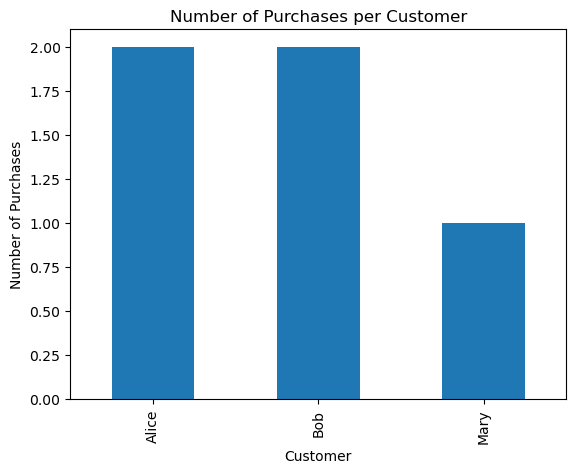

In [99]:
# Simple Visual of purchase frequency.

customer_summary["purchase_count"].plot(kind="bar")
plt.title("Number of Purchases per Customer")
plt.xlabel("Customer")
plt.ylabel("Number of Purchases")
plt.show()



### Business Classification (Label customer behavior)

In [100]:
def classify_customer(row):
    if row["purchase_count"] >= 2 and row["average_spend"] >= 500:
        return "High-Value"
    
    elif row["purchase_count"] < 2 and row["average_spend"] >= 500:
        return "High-value (low frequency)"
    
    elif row["purchase_count"] >= 2 and row["average_spend"] < 500:
        return "Frequent low spender"
    
    else:
        return "Normal"

customer_summary["behavior"] = customer_summary.apply(classify_customer, axis=1)

customer_summary

,total_spend,purchase_count,average_spend,behavior
customer,,,,
Alice,500,2,250.0,Frequent low spender
Bob,1000,2,500.0,High-Value
Mary,300,1,300.0,Normal


### Business Question

1. Which customer is the most valuable and why?

2. Which customer is risky?

3. If the company has limited money, who should they focus on first?

**Which customer is the most valuable and why?**

Bob is the most valuable customer because he combines high purchase frequency with high total and average spending, making him both consistent and profitable.

**Which customer is risky**

This dataset does not provide enough evidence to clearly classify any customer as risky. Based on the current thresholds, even the lowest spender (Mary) still falls within the “normal” category. Additional data such as declining trends or reduced frequency over time would be required to identify risk.

**If the company has limited money, who should they focus on first?**

If the company has limited resources, it should focus on customers who already show strong engagement with the brand thats because focusing on already engaged customers reduces acquisition costs and increases the likelihood of repeat purchases compared to investing in low-engagement customers with uncertain returns.

### Pivot Thinking (Excel → pandas)

**Classic Pivot: Total Sales by Customer & Product**

In [101]:
pivot_table = pd.pivot_table(
    df,
    values="amount",
    index="customer",
    columns="product",
    aggfunc="sum",
    fill_value=0
)

pivot_table

product,Laptop,Phone,Tablet
customer,,,
Alice,0,300,200
Bob,700,300,0
Mary,300,0,0


**Pivot Variation: Purchase Count Instead of Money**

In [102]:
# This shows customer behavior not revenue.

pivot_count = pd.pivot_table(
    df,
    values="amount",
    index="customer",
    columns="product",
    aggfunc="count",
    fill_value=0
)

pivot_count

# This answers: How often does each customer buy each product?

product,Laptop,Phone,Tablet
customer,,,
Alice,0,1,1
Bob,1,1,0
Mary,1,0,0


### Business Questions

1. Which customer relies most on a single product?

2. Which product has the broadest customer base?

3. What business action would you take from this pivot?

**Which customer relies most on a single product?**

Mary relies most on a single product, as all her recorded spending is concentrated in one product category, indicating low diversification in purchasing behavior.

**Which product has the broadest customer base?**

Phones and laptops have the broadest customer base, as they are purchased by multiple customers across the dataset.

**What business action would you take from this pivot?**

Based on this pivot analysis, the business should prioritize phones and laptops by increasing marketing investment, running targeted promotions, and ensuring consistent inventory availability, as these products drive engagement across a wide customer base.